In [1]:
# Predictive Model for Los Angeles Dodgers Promotion and Attendance (Python)

# BASED ON EXHIBIT 2.1 FROM MILLER (2015)

# import packages for analysis and modeling
import pandas as pd  # data frame operations

import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting

import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING

# read in Dodgers bobbleheads data and create data frame
dodgers = pd.read_csv("/data/dodgers.csv")

# examine the structure of the data frame
print("\nContents of dodgers data frame ---------------")

# attendance in thousands for plotting 
dodgers['attend_000'] = dodgers['attend']/1000

# print the first five rows of the data frame
print(pd.DataFrame.head(dodgers))
dodgerDF = pd.DataFrame(dodgers)

mondays = dodgers[dodgers['day_of_week'] == 'Monday']
tuesdays = dodgers[dodgers['day_of_week'] == 'Tuesday']
wednesdays = dodgers[dodgers['day_of_week'] == 'Wednesday']
thursdays = dodgers[dodgers['day_of_week'] == 'Thursday']
fridays = dodgers[dodgers['day_of_week'] == 'Friday']
saturdays = dodgers[dodgers['day_of_week'] == 'Saturday']
sundays = dodgers[dodgers['day_of_week'] == 'Sunday']

# convert days' attendance into list of vectors for box plot
data = [mondays['attend_000'], tuesdays['attend_000'], 
    wednesdays['attend_000'], thursdays['attend_000'], 
    fridays['attend_000'], saturdays['attend_000'], 
    sundays['attend_000']]
ordered_day_names = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

ordered_team_names = (sorted(set(dodgers['opponent']), reverse = True))


C:\Users\datab\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools



Contents of dodgers data frame ---------------
  month  day  attend day_of_week opponent  temp   skies day_night cap shirt  \
0   APR   10   56000     Tuesday  Pirates    67  Clear        Day  NO    NO   
1   APR   11   29729   Wednesday  Pirates    58  Cloudy     Night  NO    NO   
2   APR   12   28328    Thursday  Pirates    57  Cloudy     Night  NO    NO   
3   APR   13   31601      Friday   Padres    54  Cloudy     Night  NO    NO   
4   APR   14   46549    Saturday   Padres    57  Cloudy     Night  NO    NO   

  fireworks bobblehead  attend_000  
0        NO         NO      56.000  
1        NO         NO      29.729  
2        NO         NO      28.328  
3       YES         NO      31.601  
4        NO         NO      46.549  


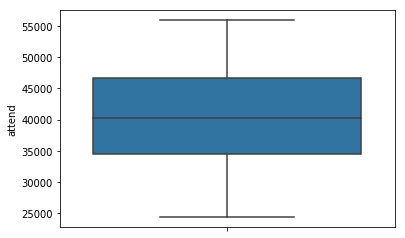

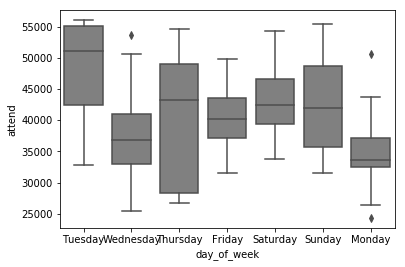

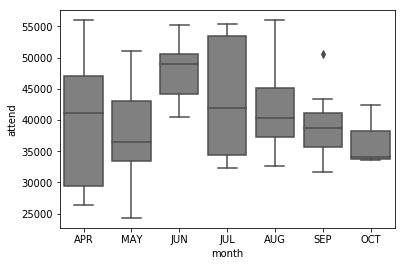

In [3]:
## SUMMARY STATISTICS

np.mean(dodgers['attend'])
# np.min(dodgers['attend'])
# np.max(dodgers['attend'])

sns.boxplot(y="attend", data=dodgers)
plt.show()

sns.boxplot(x="day_of_week", y="attend", data=dodgers, color = "gray");
plt.show()

# NUMBER OF PROMOTIONS - ONLY WORKS WITH BINARY VARIABLES

#cap = np.count_nonzero(dodgers['cap'])
#print(cap)
#shirt = np.count_nonzero(dodgers['shirt'])
#print(shirt)
#fire = np.count_nonzero(dodgers['fireworks'])
#print(fire)
#bob = np.count_nonzero(dodgers['bobblehead'])
#print(bob)

#print(cap + shirt + fire + bob)

sns.boxplot(x="month", y="attend", data=dodgers, color = "gray")
plt.show()


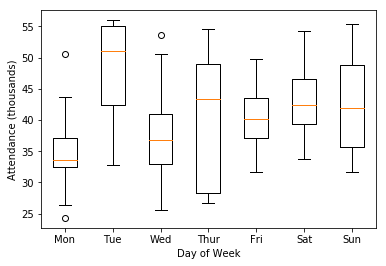

In [6]:
# exploratory data analysis: box plot for day of the week
# FROM MILLER (2015)
fig, axis = plt.subplots()
axis.set_xlabel('Day of Week')
axis.set_ylabel('Attendance (thousands)')
day_plot = plt.boxplot(data, sym='o', vert=1, whis=1.5)
plt.setp(day_plot['boxes'], color = 'black')    
plt.setp(day_plot['whiskers'], color = 'black')    
plt.setp(day_plot['fliers'], color = 'black', marker = 'o')
axis.set_xticklabels(ordered_day_names)
#plt.show()
plt.savefig('fig_advert_promo_dodgers_eda_day_of_week_Python.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 
plt.show()


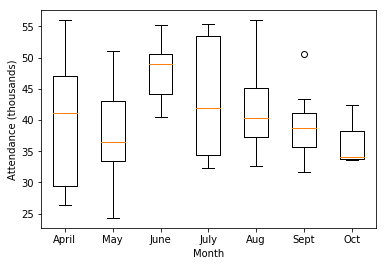

In [7]:
# exploratory data analysis: box plot for day of the week

april = dodgers[dodgers['month'] == 'APR']
may = dodgers[dodgers['month'] == 'MAY']
june = dodgers[dodgers['month'] == 'JUN']
july = dodgers[dodgers['month'] == 'JUL']
august = dodgers[dodgers['month'] == 'AUG']
september = dodgers[dodgers['month'] == 'SEP']
october = dodgers[dodgers['month'] == 'OCT']

data = [april['attend_000'], may['attend_000'], 
    june['attend_000'], july['attend_000'], 
    august['attend_000'], september['attend_000'], 
    october['attend_000']]
ordered_month_names = ['April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct']

fig, axis = plt.subplots()
axis.set_xlabel('Month')
axis.set_ylabel('Attendance (thousands)')
day_plot = plt.boxplot(data, sym='o', vert=1, whis=1.5)
plt.setp(day_plot['boxes'], color = 'black')    
plt.setp(day_plot['whiskers'], color = 'black')    
plt.setp(day_plot['fliers'], color = 'black', marker = 'o')
axis.set_xticklabels(ordered_month_names)
plt.show()

## CODE TO SAVE IMAGE FILE
# plt.savefig('fig_advert_promo_dodgers_eda_month_Python.pdf', 
#    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
#    orientation='portrait', papertype=None, format=None, 
#    transparent=True, pad_inches=0.25, frameon=None)  




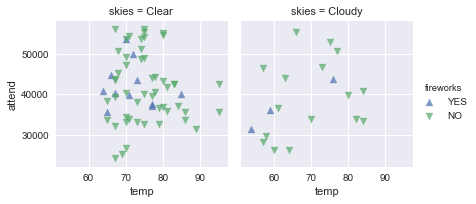

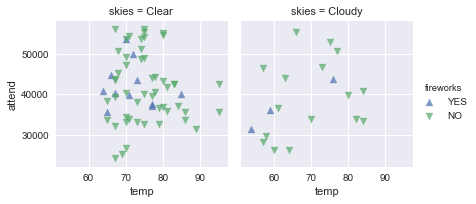

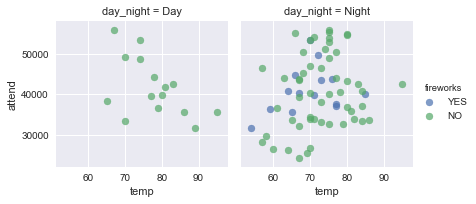

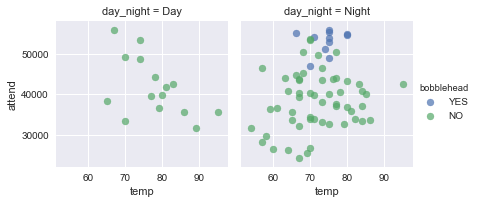

In [13]:
# trellis/lattice plot attendance by temp, conditioning on skies 
# and day_night with bobblehead NO/YES shown in distinct colors
import seaborn as sns

sns.set(style="darkgrid")

g = sns.FacetGrid(dodgers, col="skies", hue="fireworks", 
                  hue_order=["YES", "NO"],
                  hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "temp", "attend", alpha=.7)
g.add_legend();
plt.show()

g = sns.FacetGrid(dodgers, col="day_night", hue="fireworks",
                hue_order=["YES", "NO"],)
g.map(plt.scatter, "temp", "attend", alpha=.7)
g.add_legend();
plt.show()

g = sns.FacetGrid(dodgers, col="day_night", hue="bobblehead",
                hue_order=["YES", "NO"],)
g.map(plt.scatter, "temp", "attend", alpha=.7)
g.add_legend();
plt.show()

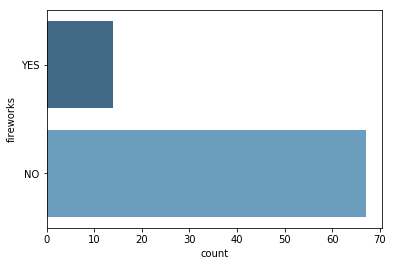

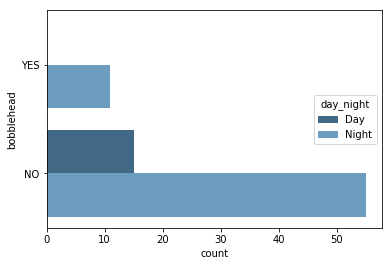

In [7]:
# DODGER PROMOTIONS BY TYPE

sns.countplot(y="fireworks", data=dodgers, palette="Blues_d",
             order=["YES", "NO"])
#g.add_legend();
plt.show()

sns.countplot(y="bobblehead", hue="day_night",
                data=dodgers, palette="Blues_d",
                order=["YES", "NO"])
#g.add_legend();
plt.show()

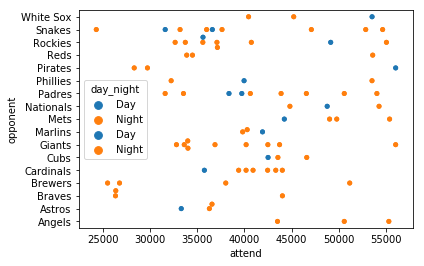

In [9]:
# Dodgers attendance by Visiting Team
# Figure 2.4 from Miller

# teams = sorted(["opponent"], reverse=True)
sns.swarmplot(x="attend", y="opponent", hue="day_night", 
              data=dodgers, order =ordered_team_names)
#g.add_legend();
plt.show()

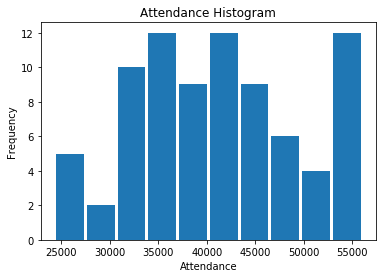

In [10]:
# CREATE A HISTOGRAM OF ATTENDANCE

# CREATE BINS

plt.hist(dodgers['attend'], normed = False, stacked = False, rwidth = .9)
plt.title("Attendance Histogram")
plt.xlabel('Attendance')
plt.ylabel('Frequency')

plt.show()

In [11]:
# BLOCK FOR ORDERING DATA

# map day_of_week to ordered_day_of_week 
day_to_ordered_day = {'Monday' : '1Monday', 
    'Tuesday' : '2Tuesday', 
    'Wednesday' : '3Wednesday', 
    'Thursday' : '4Thursday', 
    'Friday' : '5Friday',
    'Saturday' : '6Saturday',
    'Sunday' : '7Sunday'}
dodgers['ordered_day_of_week'] = dodgers['day_of_week'].map(day_to_ordered_day)   

# map month to ordered_month
month_to_ordered_month = {'APR' : '1April', 
     'MAY' : '2May', 
     'JUN' : '3June', 
     'JUL' : '4July', 
     'AUG' : '5Aug',
     'SEP' : '6Sept',
     'OCT' : '7Oct'}
dodgers['ordered_month'] = dodgers['month'].map(month_to_ordered_month)    



In [12]:
# employ training-and-test regimen for model validation
np.random.seed(1234)
dodgers['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(dodgers))
dodgers_train = dodgers[dodgers['runiform'] >= 0.33]
dodgers_test = dodgers[dodgers['runiform'] < 0.33]
# check training data frame
print('\ndodgers_train data frame (rows, columns): ',dodgers_train.shape)
print(dodgers_train.head())
# check test data frame
print('\ndodgers_test data frame (rows, columns): ',dodgers_test.shape)
print(dodgers_test.head())

# specify a simple model with bobblehead entered last
my_model = str('attend ~ ordered_month + ordered_day_of_week + bobblehead')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = dodgers_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
dodgers_train['predict_attend'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
dodgers_test['predict_attend'] = train_model_fit.predict(dodgers_test)

  


dodgers_train data frame (rows, columns):  (57, 16)
  month  day  attend day_of_week opponent  temp   skies day_night cap shirt  \
1   APR   11   29729   Wednesday  Pirates    58  Cloudy     Night  NO    NO   
2   APR   12   28328    Thursday  Pirates    57  Cloudy     Night  NO    NO   
3   APR   13   31601      Friday   Padres    54  Cloudy     Night  NO    NO   
4   APR   14   46549    Saturday   Padres    57  Cloudy     Night  NO    NO   
7   APR   24   44014     Tuesday   Braves    63  Cloudy     Night  NO    NO   

  fireworks bobblehead  attend_000 ordered_day_of_week ordered_month  runiform  
1        NO         NO      29.729          3Wednesday        1April  0.622109  
2        NO         NO      28.328           4Thursday        1April  0.437728  
3       YES         NO      31.601             5Friday        1April  0.785359  
4        NO         NO      46.549           6Saturday        1April  0.779976  
7        NO         NO      44.014            2Tuesday        1Apri

C:\Users\datab\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\datab\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [13]:
# compute the proportion of response variance
# accounted for when predicting out-of-sample
print('\nProportion of Test Set Variance Accounted for: ',\
    round(np.power(dodgers_test['attend'].corr(dodgers_test['predict_attend']),2),3))

# use the full data set to obtain an estimate of the increase in
# attendance due to bobbleheads, controlling for other factors 
my_model_fit = smf.ols(my_model, data = dodgers).fit()
print(my_model_fit.summary())

print('\nEstimated Effect of Bobblehead Promotion on Attendance: ',\
    round(my_model_fit.params[13],0))
    
# Suggestions for the student: Reproduce the figures in this chapter
# using matplotlib, ggplot, and/or rpy2 calls to R graphics. 
# Examine regression diagnostics for the fitted model.
# Examine other linear predictors and other explanatory variables.
# See if you can improve upon the model with variable transformations. 


Proportion of Test Set Variance Accounted for:  0.217
                            OLS Regression Results                            
Dep. Variable:                 attend   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     6.158
Date:                Tue, 24 Oct 2017   Prob (F-statistic):           2.08e-07
Time:                        16:08:14   Log-Likelihood:                -813.52
No. Observations:                  81   AIC:                             1655.
Df Residuals:                      67   BIC:                             1689.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

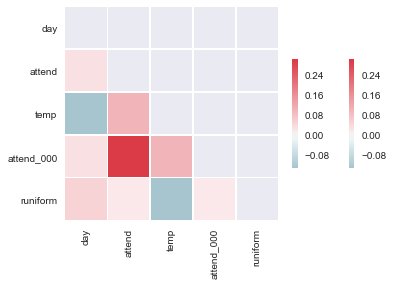

In [20]:
corr = dodgerDF.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()